In [1]:
try:
    from openmdao.utils.notebook_utils import notebook_mode
except ImportError:
    !python -m pip install openmdao[notebooks]

# Visually Checking Partial Derivatives with Matrix Diagrams

The function `partial_deriv_plot` lets you see a visual representation of the values returned by `check_partials`.

```{eval-rst}
    .. autofunction:: openmdao.visualization.partial_deriv_plot.partial_deriv_plot
        :noindex:
```

Here are two examples of its use. Note that in these examples, the `compute_partials` method intentionally computes the incorrect value so that the plots show how this function can be used to detect such errors.

With the default value of `binary` equal to `True`, the plots will only show the presence of a non-zero derivative, not the value.

In [2]:
import numpy as np
import openmdao.api as om

class ArrayComp2D(om.ExplicitComponent):
    """
    A fairly simple array component with an intentional error in compute_partials.
    """
    def setup(self):
        self.JJ = np.array([[1.0, 0.0, 0.0, 7.0],
                            [0.0, 2.5, 0.0, 0.0],
                            [-1.0, 0.0, 8.0, 0.0],
                            [0.0, 4.0, 0.0, 6.0]])
        # Params
        self.add_input('x1', np.ones([4]))
        # Unknowns
        self.add_output('y1', np.zeros([4]))
        self.declare_partials(of='*', wrt='*')

    def compute(self, inputs, outputs):
        """
        Execution.
        """
        outputs['y1'] = self.JJ.dot(inputs['x1'])

    def compute_partials(self, inputs, partials):
        """
        Analytical derivatives.
        """
        # create some error to force the diff plot to show something
        error = np.zeros((4, 4))
        err = 1e-7
        error[0][3] = err
        error[1][2] = - 2.0 * err
        partials[('y1', 'x1')] = self.JJ + error

prob = om.Problem()
model = prob.model
model.add_subsystem('mycomp', ArrayComp2D(), promotes=['x1', 'y1'])
prob.setup(check=False, mode='fwd')
check_partials_data = prob.check_partials(out_stream=None)

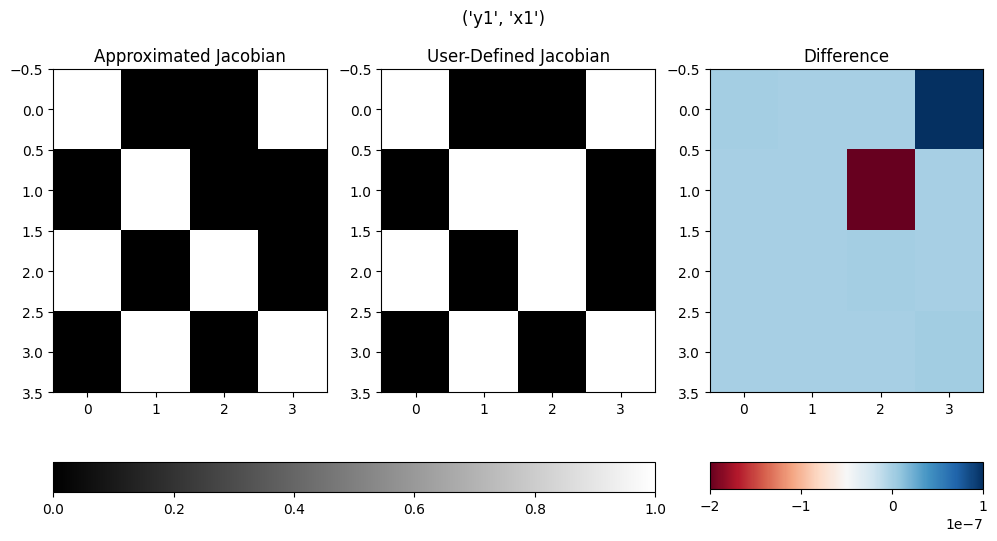

(<Figure size 1200x600 with 5 Axes>,
 array([<AxesSubplot:title={'center':'Approximated Jacobian'}>,
        <AxesSubplot:title={'center':'User-Defined Jacobian'}>,
        <AxesSubplot:title={'center':'Difference'}>], dtype=object))

In [3]:
# plot with defaults
om.partial_deriv_plot('y1', 'x1', check_partials_data)

With the value of `binary` equal to `False`, the plots show the actual value.

In [4]:
import numpy as np
import openmdao.api as om

class ArrayComp2D(om.ExplicitComponent):
    """
    A fairly simple array component with an intentional error in compute_partials.
    """
    def setup(self):
        self.JJ = np.array([[1.0, 0.0, 0.0, 7.0],
                            [0.0, 2.5, 0.0, 0.0],
                            [-1.0, 0.0, 8.0, 0.0],
                            [0.0, 4.0, 0.0, 6.0]])
        # Params
        self.add_input('x1', np.ones([4]))
        # Unknowns
        self.add_output('y1', np.zeros([4]))
        self.declare_partials(of='*', wrt='*')

    def compute(self, inputs, outputs):
        """
        Execution.
        """
        outputs['y1'] = self.JJ.dot(inputs['x1'])

    def compute_partials(self, inputs, partials):
        """
        Analytical derivatives.
        """
        # create some error to force the diff plot to show something
        error = np.zeros((4, 4))
        err = 1e-7
        error[0][3] = err
        error[1][2] = - 2.0 * err
        partials[('y1', 'x1')] = self.JJ + error

prob = om.Problem()
model = prob.model
model.add_subsystem('mycomp', ArrayComp2D(), promotes=['x1', 'y1'])
prob.setup(check=False, mode='fwd')
check_partials_data = prob.check_partials(out_stream=None)

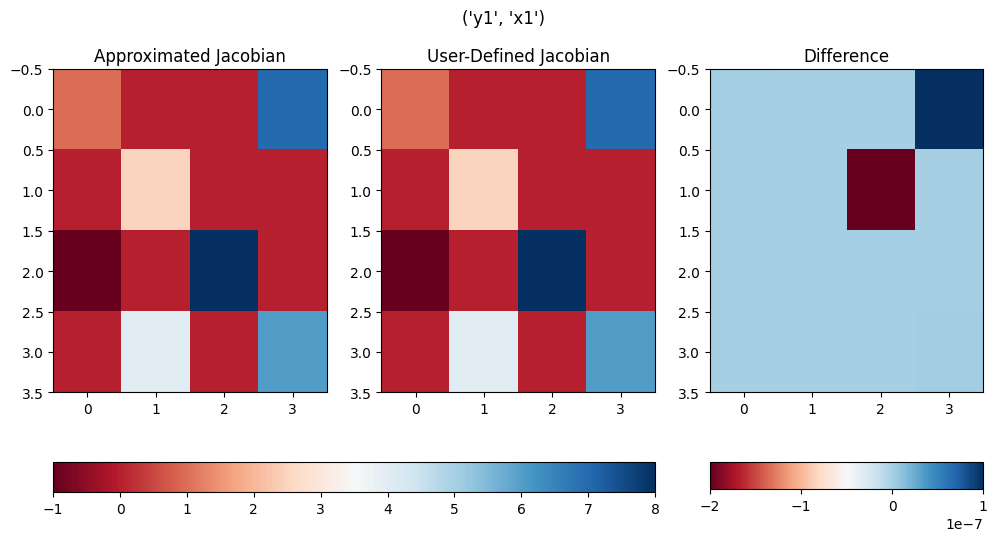

(<Figure size 1200x600 with 5 Axes>,
 array([<AxesSubplot:title={'center':'Approximated Jacobian'}>,
        <AxesSubplot:title={'center':'User-Defined Jacobian'}>,
        <AxesSubplot:title={'center':'Difference'}>], dtype=object))

In [5]:
# plot in non-binary mode
om.partial_deriv_plot('y1', 'x1', check_partials_data, binary = False)